# RNN

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data Preprocessing

*Importing Data*

In [2]:
google_stock_train = pd.read_csv('dataset/Google_Stock_Price_Train.csv')
google_stock_test = pd.read_csv('dataset/Google_Stock_Price_Test.csv')

In [3]:
google_stock_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
google_stock_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


*Visualising historical trend*

In [5]:
google_stock_train['Date'] = pd.to_datetime(google_stock_train['Date'])

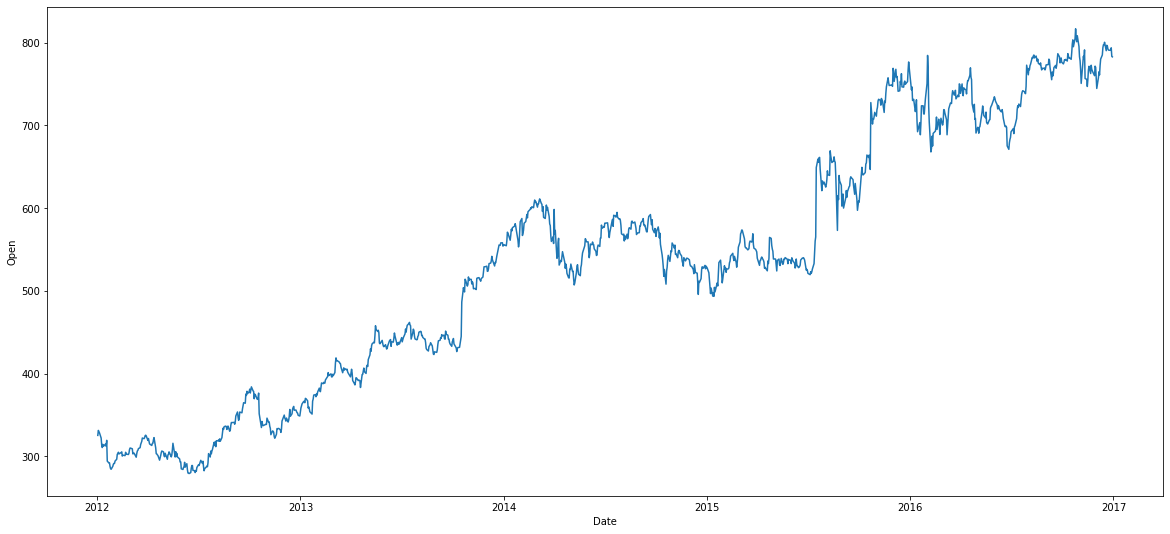

In [6]:
plt.figure(figsize=(20, 9))
sns.lineplot(x='Date', y='Open', data=google_stock_train)

*Getting training set in correct shape*

In [7]:
training_set = google_stock_train['Open'].values

In [8]:
training_set.shape

(1258,)

In [9]:
training_set = training_set.reshape(-1, 1)

In [10]:
training_set.shape

(1258, 1)

*Normalising the training set*

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler()

In [13]:
training_set_scaled = scaler.fit_transform(training_set)

In [14]:
training_set_scaled[:5]

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       [0.09156187],
       [0.07984225]])

In [16]:
timestep = 60

*Creating X_train and y_train variables*

In [15]:
X_train = []
y_train = []

In [17]:
for i in range(timestep, training_set.shape[0]):
    X_train.append(training_set_scaled[i - timestep:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [18]:
X_train[0]

array([0.08581368, 0.09701243, 0.09433366, 0.09156187, 0.07984225,
       0.0643277 , 0.0585423 , 0.06568569, 0.06109085, 0.06639259,
       0.0614257 , 0.07474514, 0.02797827, 0.02379269, 0.02409033,
       0.0159238 , 0.01078949, 0.00967334, 0.01642607, 0.02100231,
       0.02280676, 0.02273235, 0.02810849, 0.03212665, 0.0433812 ,
       0.04475779, 0.04790163, 0.0440695 , 0.04648783, 0.04745517,
       0.04873875, 0.03936305, 0.04137213, 0.04034898, 0.04784582,
       0.04325099, 0.04356723, 0.04286033, 0.04602277, 0.05398467,
       0.05738894, 0.05714711, 0.05569611, 0.04421832, 0.04514845,
       0.04605997, 0.04412531, 0.03675869, 0.04486941, 0.05065481,
       0.05214302, 0.05612397, 0.05818885, 0.06540665, 0.06882953,
       0.07243843, 0.07993526, 0.07846566, 0.08034452, 0.08497656])

In [19]:
y_train[0]

0.08627874097775134

In [20]:
X_train.shape

(1198, 60)

In [21]:
y_train.shape

(1198,)

In [22]:
X_train = X_train.reshape(X_train.shape[0], timestep, 1)

### Building the RNN

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

*RNN Structure*

In [ ]:
rnn = Sequential()

In [25]:
# LSTM Layer with Dropout 1
rnn.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
rnn.add(Dropout(0.2))
# LSTM Layer with Dropout 2
rnn.add(LSTM(units=128, return_sequences=True))
rnn.add(Dropout(0.2))
# LSTM Layer with Dropout 3
rnn.add(LSTM(units=128, return_sequences=True))
rnn.add(Dropout(0.2))
# LSTM Layer with Dropout 4
rnn.add(LSTM(units=128))
rnn.add(Dropout(0.2))

# Output Layer
rnn.add(Dense(units=1))

*Compiling the structure for regression*

In [26]:
rnn.compile(optimizer='adam', loss='mean_squared_error')

*Fitting Data*

In [27]:
rnn.fit(x=X_train, y=y_train, epochs=100, workers=6, batch_size=32)

Train on 1198 samples
Epoch 1/100
1198/1198 [==============================] - 8s 7ms/sample - loss: 0.0359 2s - loss: 0
Epoch 2/100
1198/1198 [==============================] - 1s 812us/sample - loss: 0.0039
Epoch 3/100
1198/1198 [==============================] - 1s 819us/sample - loss: 0.0034
Epoch 4/100
1198/1198 [==============================] - 1s 814us/sample - loss: 0.0033
Epoch 5/100
1198/1198 [==============================] - 1s 817us/sample - loss: 0.0031
Epoch 6/100
1198/1198 [==============================] - 1s 812us/sample - loss: 0.0033
Epoch 7/100
1198/1198 [==============================] - 1s 816us/sample - loss: 0.0029
Epoch 8/100
1198/1198 [==============================] - 1s 817us/sample - loss: 0.0031
Epoch 9/100
1198/1198 [==============================] - 1s 800us/sample - loss: 0.0029
Epoch 10/100
1198/1198 [==============================] - 1s 798us/sample - loss: 0.0028
Epoch 11/100
1198/1198 [==============================] - 1s 800us/sample - loss: 0.00

### Predictions and Visualization

In [52]:
y_test = google_stock_test['Open'].values

In [29]:
y_test.shape

(20, 1)

*Processing the inputs for predictions*

In [32]:
dataset_total = pd.concat([google_stock_train['Open'], google_stock_test['Open']], axis=0)

In [35]:
dataset_input = dataset_total.iloc[len(dataset_total) - len(google_stock_test) - timestep:].values

In [37]:
dataset_input.shape

(80,)

In [39]:
dataset_input = dataset_input.reshape(-1, 1)

In [41]:
dataset_input = scaler.transform(dataset_input)

In [42]:
X_test = []

In [44]:
for i in range(60, dataset_input.shape[0]):
    X_test.append(dataset_input[i - timestep: i, 0])

X_test = np.array(X_test)

In [45]:
X_test.shape

(20, 60)

In [46]:
X_test = X_test.reshape(X_test.shape[0], timestep, 1)

*Making predictions*

In [47]:
pred = rnn.predict(X_test)

In [48]:
pred = scaler.inverse_transform(pred)

In [55]:
prediction_df = pd.DataFrame()
prediction_df['Real Stock Price'] = y_test
prediction_df['Predicted Stock Price'] = pred

In [56]:
prediction_df.head()

,Real Stock Price,Predicted Stock Price
0,778.81,786.522705
1,788.36,783.778748
2,786.08,788.059631
3,795.26,789.127136
4,806.40,793.727600


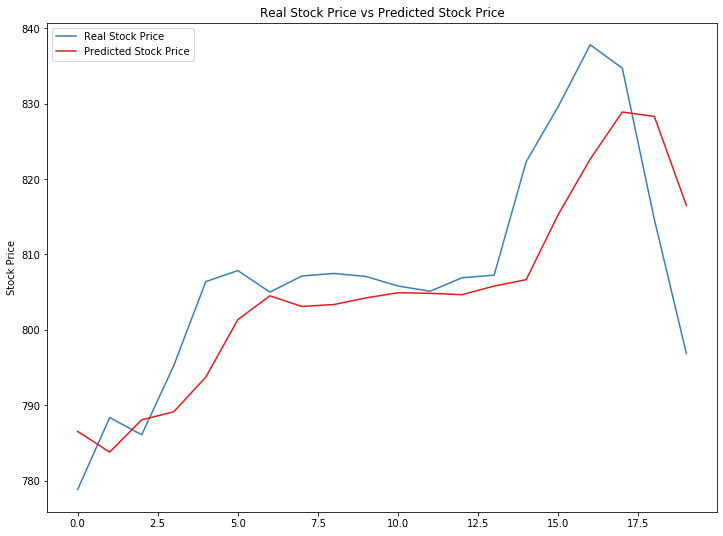

In [61]:
plt.figure(figsize=(12, 9))
sns.lineplot(x=prediction_df.index, y=prediction_df['Real Stock Price'], color='#377EB8', label='Real Stock Price')
sns.lineplot(x=prediction_df.index, y=prediction_df['Predicted Stock Price'], color='#E41A1C', label='Predicted Stock Price').set(ylabel='Stock Price', title='Real Stock Price vs Predicted Stock Price')
plt.legend()